# Used Car Price Prediction

# Task to perform
1. Select dataset
1. Carry out Exploratory Data Analaysis
1. Apply Algorithm
1. Extract association rules

# 1. Dataset - used car price
## Dataset Description

| columns      | description                                |
| ------------ | ------------------------------------------ |
| model        | The model name for Volkswagen Car.         |
| year         | The registration year of the car.          |
| price        | Price of the car                           |
| transmission | The type of transmission used by the car.  |
| mileage      | The total distance the car has travelled.  |
| fuelType     | The type of fuel used by the car.          |
| tax          | Tax applied on the car.                    |
| mpg          | Miles per gallon                           |
| engineSize   | The displacement volume of the car engine. |


importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [2]:
data = pd.read_csv('./vw.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


All data is complete, no null values

In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# 2. Exploratory Data Analysis

In [5]:
data['age']=2020-data['year']
data.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,1


### Categories Features

In [6]:
data.select_dtypes(include=['object']).describe()

,model,transmission,fuelType
count,15157,15157,15157
unique,27,3,4
top,Golf,Manual,Petrol
freq,4863,9417,8553


#### Model

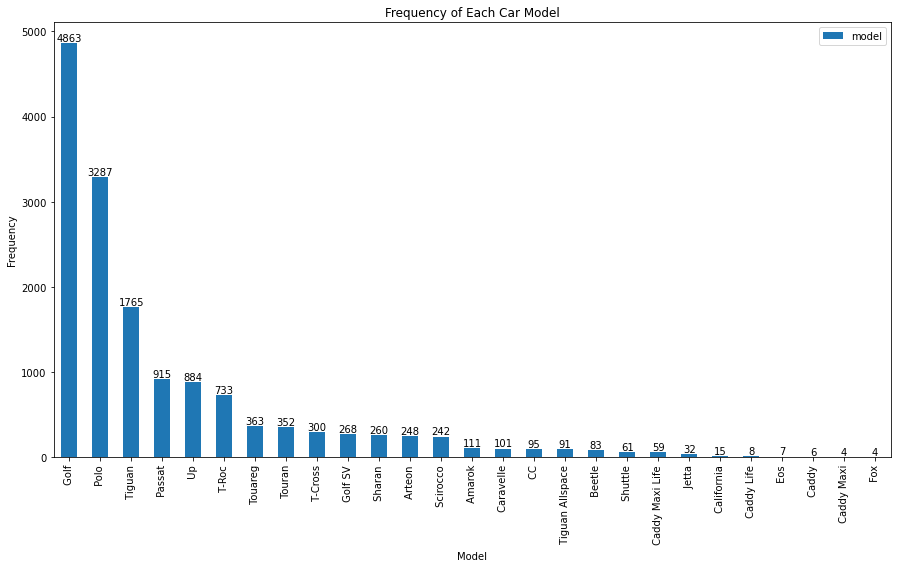

In [7]:
# print(data['model'].value_counts().sort_values(ascending=False) / len(data) * 100)

plt.figure(1, figsize=(15, 8))
ax = data['model'].value_counts().sort_values(ascending=False).plot.bar()
plt.title(u'Frequency of Each Car Model')
plt.xlabel(u'Model')
plt.ylabel(u'Frequency')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

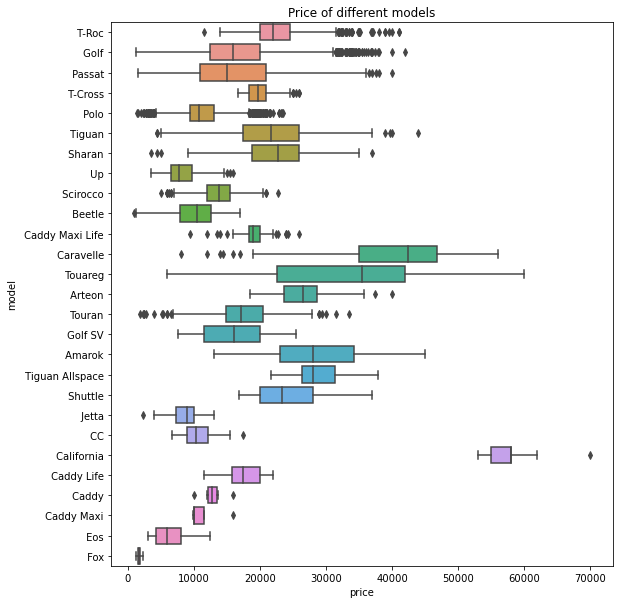

In [8]:
plt.figure(figsize=(9,10))
sns.boxplot(data=data,y='model',x='price')
plt.title('Price of different models')
plt.show()

#### Fuel Type

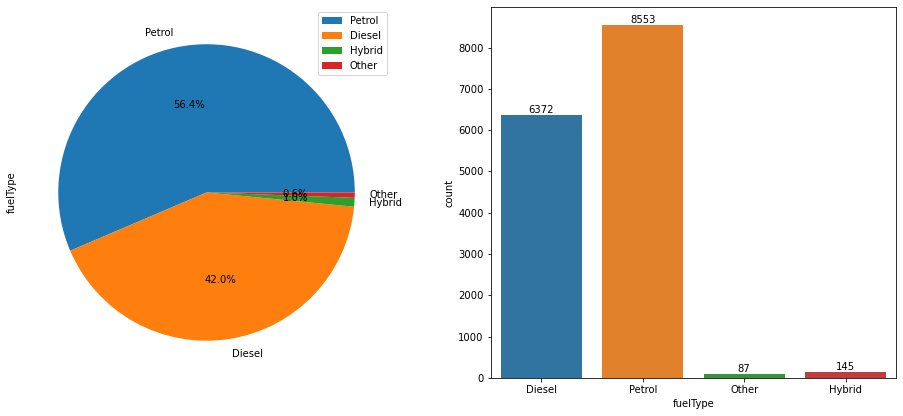

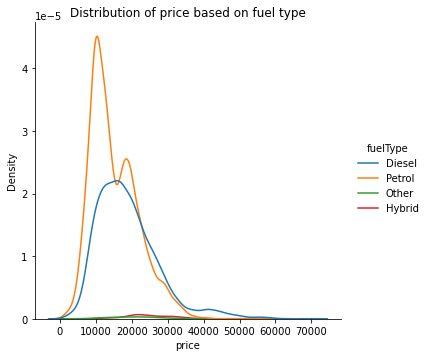

In [9]:
plt.figure(figsize=(16,15))
plt.subplot2grid((2,2),(0,0))
data['fuelType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()

plt.subplot2grid((2, 2), (0, 1))
ax= sns.countplot(x=data['fuelType'])
plt.bar_label(ax.containers[0])
plt.show()

sns.displot(data=data,x='price',kind='kde',hue='fuelType')
plt.title('Distribution of price based on fuel type')
plt.show()


#### Transmission

Text(0.5, 1.0, 'Count of different types of transmission')

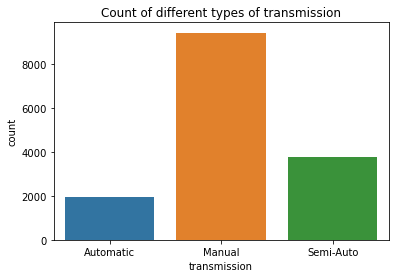

In [10]:
sns.countplot(data=data,x='transmission')
plt.title('Count of different types of transmission')

<AxesSubplot:xlabel='transmission', ylabel='price'>

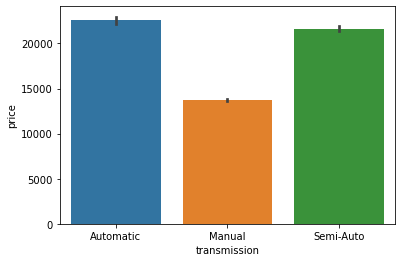

In [11]:
sns.barplot(x=data['transmission'],y=data['price'])

### Numeric Features

In [12]:
data.select_dtypes(include=['int','float']).describe()

,year,price,mileage,tax,mpg,engineSize,age
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693,2.744211
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695,2.053059
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000,1.000000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000,3.000000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000,4.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000,20.000000


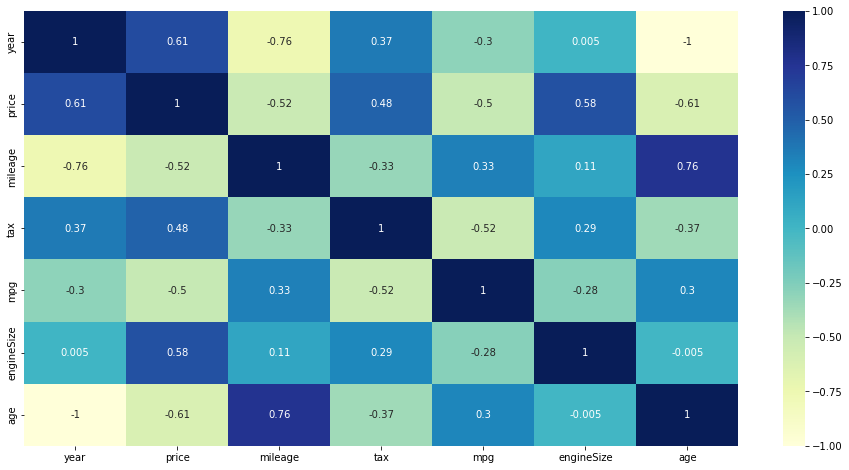

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the heatmap, it shows the correlation between each feature. We only focus on the price column, the most correlated is 

#### Year / Age

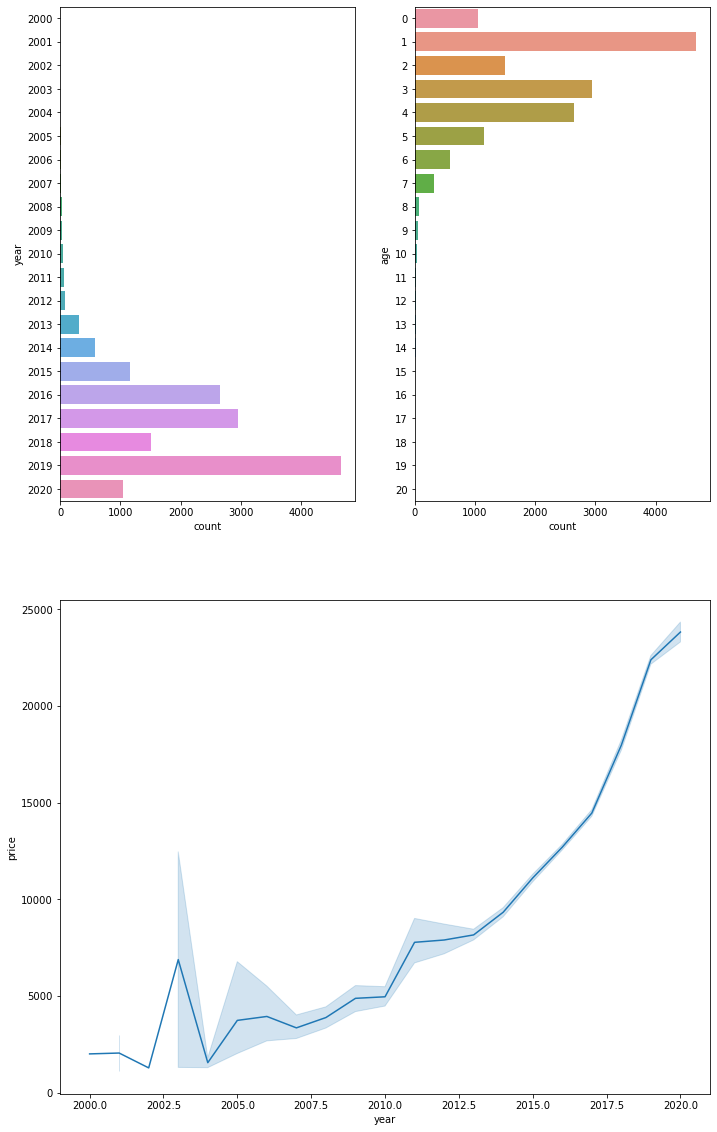

In [14]:
plt.figure(figsize=(18,20))
plt.subplot2grid((2, 3), (0, 0))
sns.countplot(y=data['year'])

plt.subplot2grid((2, 3), (0, 1))
sns.countplot(y=data['age'])

plt.subplot2grid((2, 3), (1, 0),colspan=2)
sns.lineplot(x='year',y='price',data=data)
plt.show()


Majority data is after 2014, and newer car are more expensive.

#### mpg

<AxesSubplot:xlabel='mpg'>

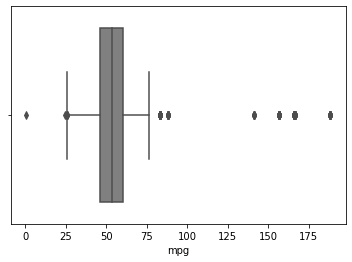

In [15]:
sns.boxplot(data=data,x='mpg',color='grey')

#### mileage

Text(0.5, 1.0, 'Distribution of Mileage')

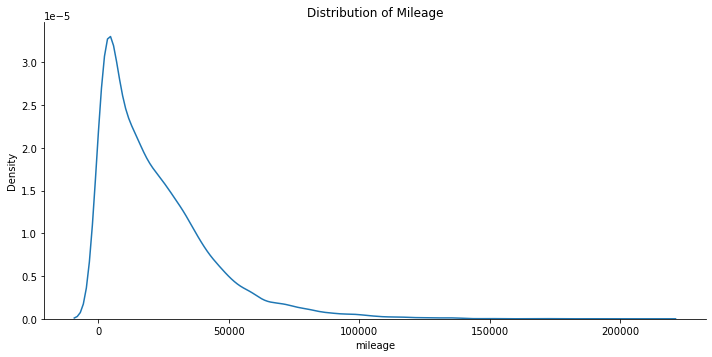

In [ ]:
sns.displot(data=data,x='mileage',kind='kde',aspect=10/5,height=5)
plt.title('Distribution of Mileage')

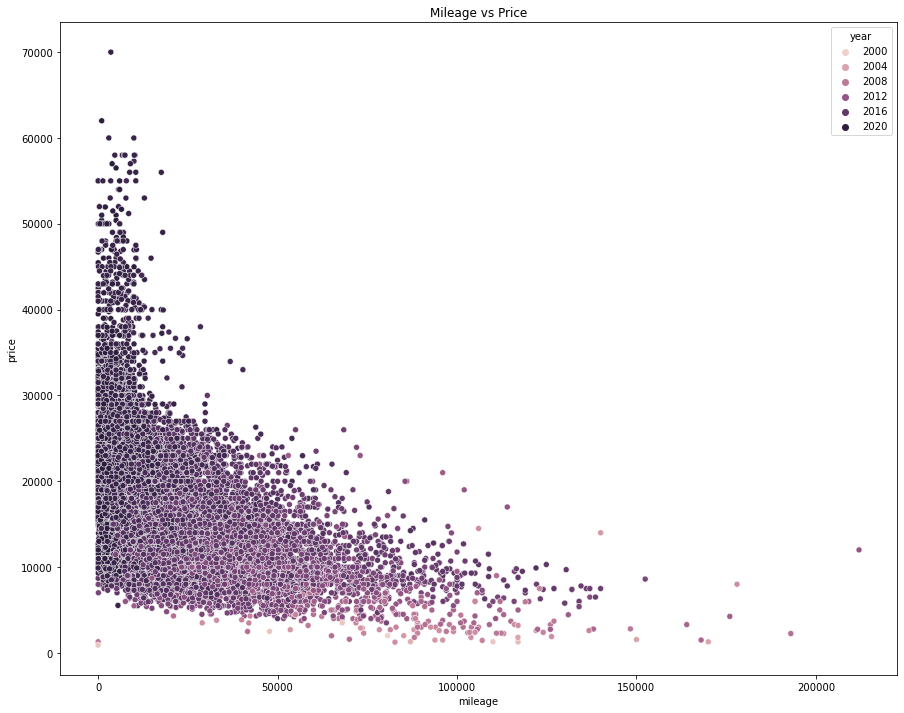

In [16]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data['mileage'],y=data['price'],hue=data['year'])
plt.title('Mileage vs Price')
plt.show()

<AxesSubplot:xlabel='mileage'>

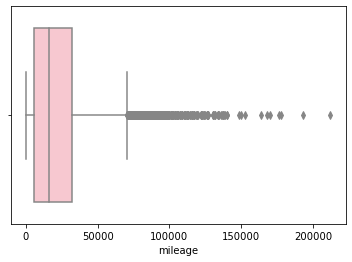

In [17]:
sns.boxplot(data=data,x='mileage',color='pink')

#### tax

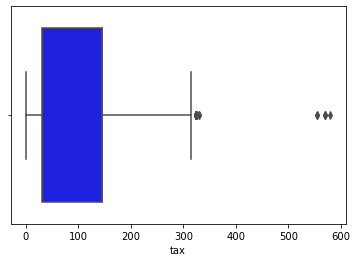

In [18]:
sns.boxplot(data=data, x='tax', color='blue')
plt.show()

### Engine Size

Text(0.5, 1.0, 'Average engine Size for each model')

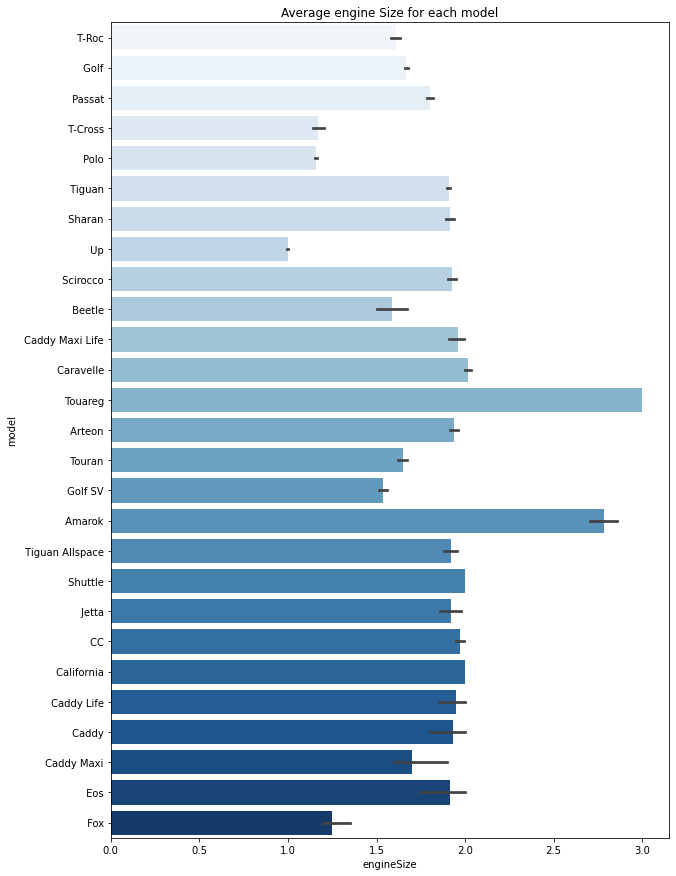

In [20]:
plt.figure(figsize=(10,15))
sns.barplot(data=data,y='model',x='engineSize',palette='Blues')
plt.title('Average engine Size for each model')

## Feature Engineering

### Feature with category - OneHotEncoder

In [21]:
data.drop(columns='year',inplace=True)
data.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1


In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_columns = ['model', 'transmission', 'fuelType']

In [23]:
oneHotEncoder = OneHotEncoder(drop='first')
cat_features = oneHotEncoder.fit_transform(data[cat_columns]).toarray()
cat_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Number features - 

In [24]:
from sklearn.preprocessing import StandardScaler
num_columns = ['mileage', 'tax', 'mpg', 'engineSize', 'age']


In [25]:
standardScaler = StandardScaler()
num_features = standardScaler.fit_transform(data[num_columns])
num_features

array([[-0.38720878,  0.50812   , -0.30445949,  0.86490153, -0.84959483],
       [-0.82894758,  0.50812   , -0.30445949,  0.86490153, -0.84959483],
       [-0.69409005,  0.50812   , -0.24581591,  0.86490153, -0.84959483],
       ...,
       [ 2.2653046 ,  1.37452748, -0.86157349, -0.43470151,  4.02134696],
       [ 2.86601642,  0.58688432, -0.54636425, -0.86790253,  5.48262949],
       [ 2.4544456 ,  0.50812   , -0.54636425, -0.86790253,  4.99553531]])

## X and Y

In [26]:
X = np.hstack([cat_features, num_features])
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.30445949,
         0.86490153, -0.84959483],
       [ 0.        ,  0.        ,  0.        , ..., -0.30445949,
         0.86490153, -0.84959483],
       [ 0.        ,  0.        ,  0.        , ..., -0.24581591,
         0.86490153, -0.84959483],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.86157349,
        -0.43470151,  4.02134696],
       [ 0.        ,  0.        ,  0.        , ..., -0.54636425,
        -0.86790253,  5.48262949],
       [ 0.        ,  0.        ,  0.        , ..., -0.54636425,
        -0.86790253,  4.99553531]])

In [27]:
y = data["price"].to_numpy()
y

array([25000, 26883, 20000, ...,  1590,  1250,  2295], dtype=int64)

## Modeling

### Splitting training and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10609, 36), (4548, 36), (10609,), (4548,))

In [31]:
df = pd.DataFrame(X_train)
df['price'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.678770,0.508120,1.506161,-0.001500,0.124594,12995
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.044190,0.586884,-0.429077,-1.301104,-1.336689,21995
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.970425,0.508120,-0.656321,-0.218101,-0.849595,19436
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.563063,0.508120,-0.751617,-0.218101,-0.849595,21366
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,-0.260626,0.429356,8.242842,-0.434702,-0.362501,21995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.319600,0.586884,-0.304459,0.864902,0.124594,21850
10605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.227337,0.508120,-1.022843,0.864902,0.124594,24989
10606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.795611,-1.460988,0.663160,-1.301104,0.611688,6999
10607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.788992,0.508120,0.465237,-1.301104,-0.362501,10995


### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [33]:
randomForestRegressor = RandomForestRegressor(n_estimators=300,random_state=40,n_jobs=-1)

In [34]:
rfr_model = randomForestRegressor.fit(X_train, y_train)

In [35]:
pred = rfr_model.predict(X_test)
result = pd.DataFrame({'pred_price': pred.astype(np.float64)})
result.to_csv("./random_forest_predictions.csv",index=False)

In [36]:
pred_price = pd.read_csv("./random_forest_predictions.csv")
test_price = pd.DataFrame({'Test data price': y_test})
pred_test_price = pred_price.assign(test_price=test_price)
pred_test_price

,pred_price,test_price
0,7283.766667,6399
1,13303.290000,10999
2,16248.700000,16700
3,9866.116667,9890
4,13487.396667,15499
...,...,...
4543,10059.506667,10995
4544,12321.320000,13390
4545,10409.000659,9999
4546,8482.176667,8995


<Figure size 432x288 with 0 Axes>

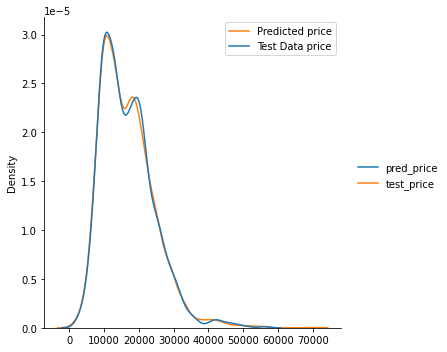

In [37]:
plt.figure()
# pred_test_price.plot(kind='kde')
sns.displot(data=pred_test_price,kind='kde')
plt.legend((u'Predicted price', u'Test Data price'))
plt.show()

In [38]:
rfr_model.score(X_train, y_train)

0.9934102344156491

In [39]:
rfr_model.score(X_test, y_test)

0.9495496019092977

### Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr_model = LinearRegression()

In [42]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [43]:
lr_model.score(X_train, y_train)

0.8879129294368825

In [44]:
lr_model.score(X_test, y_test)

0.8914152316435985

# 3. Apply Algorithm

# 4.Association rules